In [1]:
import random
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

from causal_gym import RacePCH
from causal_rl.algo.imitatation.imitate import *
from causal_gym.core import Task

In [2]:
num_steps = 200
train_eps = 500
seed = 1

# reproducibility
random.seed(seed)
torch.manual_seed(seed)

In [3]:
env = RacePCH(num_steps=num_steps, seed=seed, render_mode='rgb_array', task=Task(learning_regime='see_do'))

In [4]:
G = parse_graph(*env.env.get_graph)
X = {f'X{t}' for t in range(num_steps)}
Y = f'Y{num_steps}'
obs_prefix = env.env.observed_unobserved_vars[0]

In [5]:
Z_sets = find_sequential_pi_backdoor(G, X, Y, obs_prefix)
Z_sets

{'X29': {'C0',
  'C1',
  'C10',
  'C11',
  'C12',
  'C13',
  'C14',
  'C15',
  'C16',
  'C17',
  'C18',
  'C19',
  'C2',
  'C20',
  'C21',
  'C22',
  'C23',
  'C24',
  'C25',
  'C26',
  'C27',
  'C28',
  'C29',
  'C3',
  'C4',
  'C5',
  'C6',
  'C7',
  'C8',
  'C9',
  'H0',
  'H1',
  'H10',
  'H11',
  'H12',
  'H13',
  'H14',
  'H15',
  'H16',
  'H17',
  'H18',
  'H19',
  'H2',
  'H20',
  'H21',
  'H22',
  'H23',
  'H24',
  'H25',
  'H26',
  'H27',
  'H28',
  'H29',
  'H3',
  'H4',
  'H5',
  'H6',
  'H7',
  'H8',
  'H9',
  'X0',
  'X1',
  'X10',
  'X11',
  'X12',
  'X13',
  'X14',
  'X15',
  'X16',
  'X17',
  'X18',
  'X19',
  'X2',
  'X20',
  'X21',
  'X22',
  'X23',
  'X24',
  'X25',
  'X26',
  'X27',
  'X28',
  'X3',
  'X4',
  'X5',
  'X6',
  'X7',
  'X8',
  'X9'},
 'X126': {'C0',
  'C1',
  'C10',
  'C100',
  'C101',
  'C102',
  'C103',
  'C104',
  'C105',
  'C106',
  'C107',
  'C108',
  'C109',
  'C11',
  'C110',
  'C111',
  'C112',
  'C113',
  'C114',
  'C115',
  'C116',
  'C117',

In [6]:
records = collect_expert_trajectories(
    env,
    num_episodes=train_eps,
    max_steps=num_steps,
    behavioral_policy=None,
    seed=seed
)

Starting episode 1/500...
  Episode 1 ended at step 200 (terminated: False, truncated: True).
Starting episode 2/500...
  Episode 2 ended at step 200 (terminated: False, truncated: True).
Starting episode 3/500...
  Episode 3 ended at step 200 (terminated: False, truncated: True).
Starting episode 4/500...
  Episode 4 ended at step 200 (terminated: False, truncated: True).
Starting episode 5/500...
  Episode 5 ended at step 200 (terminated: False, truncated: True).
Starting episode 6/500...
  Episode 6 ended at step 200 (terminated: False, truncated: True).
Starting episode 7/500...
  Episode 7 ended at step 200 (terminated: False, truncated: True).
Starting episode 8/500...
  Episode 8 ended at step 200 (terminated: False, truncated: True).
Starting episode 9/500...
  Episode 9 ended at step 200 (terminated: False, truncated: True).
Starting episode 10/500...
  Episode 10 ended at step 200 (terminated: False, truncated: True).
Starting episode 11/500...
  Episode 11 ended at step 200 

In [7]:
with open('expert_traj_race.pkl', 'wb') as f:
    pickle.dump(records, f)

print(f'saved {len(records)} trajectories')

saved 100000 trajectories


In [8]:
with open('expert_traj_race.pkl', 'rb') as f:
    records = pickle.load(f)

print(f'loaded {len(records)} trajectories')

loaded 100000 trajectories


In [9]:
naive_Z_sets = {}
for Xi in X:
    i = int(Xi[1:])
    cond = set()

    for j in range(i+1):
        cond.update({f'W{j}', f'C{j}', f'H{j}'})

    for j in range(i):
        cond.add(f'X{j}')
    naive_Z_sets[Xi] = cond

In [10]:
causal_policies = train_policies(env, records, Z_sets, seed=seed, patience=20, continuous=True)
naive_policies = train_policies(env, records, naive_Z_sets, seed=seed, patience=20, continuous=True)

Stopping early at epoch 41; val_loss has not improved for 20 epochs.
Stopping early at epoch 27; val_loss has not improved for 20 epochs.
Stopping early at epoch 30; val_loss has not improved for 20 epochs.
Stopping early at epoch 25; val_loss has not improved for 20 epochs.
Stopping early at epoch 72; val_loss has not improved for 20 epochs.
Stopping early at epoch 40; val_loss has not improved for 20 epochs.
Stopping early at epoch 47; val_loss has not improved for 20 epochs.
Stopping early at epoch 41; val_loss has not improved for 20 epochs.
Stopping early at epoch 35; val_loss has not improved for 20 epochs.
Stopping early at epoch 23; val_loss has not improved for 20 epochs.
Stopping early at epoch 32; val_loss has not improved for 20 epochs.
Stopping early at epoch 27; val_loss has not improved for 20 epochs.
Stopping early at epoch 35; val_loss has not improved for 20 epochs.
Stopping early at epoch 29; val_loss has not improved for 20 epochs.
Stopping early at epoch 27; val_lo

Evaluating episode 1/500...
Evaluating episode 2/500...
Evaluating episode 3/500...
Evaluating episode 4/500...
Evaluating episode 5/500...
Evaluating episode 6/500...
Evaluating episode 7/500...
Evaluating episode 8/500...
Evaluating episode 9/500...
Evaluating episode 10/500...
Evaluating episode 11/500...
Evaluating episode 12/500...
Evaluating episode 13/500...
Evaluating episode 14/500...
Evaluating episode 15/500...
Evaluating episode 16/500...
Evaluating episode 17/500...
Evaluating episode 18/500...
Evaluating episode 19/500...
Evaluating episode 20/500...
Evaluating episode 21/500...
Evaluating episode 22/500...
Evaluating episode 23/500...
Evaluating episode 24/500...
Evaluating episode 25/500...
Evaluating episode 26/500...
Evaluating episode 27/500...
Evaluating episode 28/500...
Evaluating episode 29/500...
Evaluating episode 30/500...
Evaluating episode 31/500...
Evaluating episode 32/500...
Evaluating episode 33/500...
Evaluating episode 34/500...
Evaluating episode 35/5

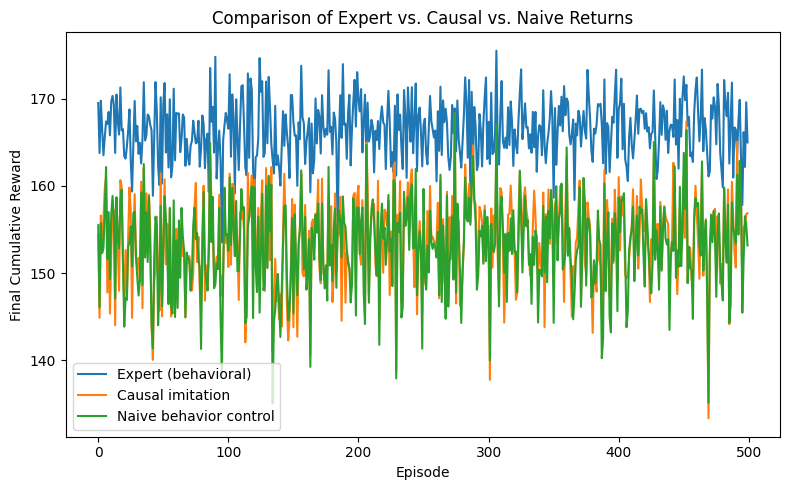

In [11]:
episode_rewards = defaultdict(float)
for rec in records:
    ep = rec['episode']
    episode_rewards[ep] = rec['info']['Y'][-1]

num_eps = len(episode_rewards)

expert_rewards = [episode_rewards[e] for e in range(num_eps)]

causal_returns = eval_policy(env, causal_policies, num_episodes=num_eps, seed=seed)
naive_returns  = eval_policy(env, naive_policies,  num_episodes=num_eps, seed=seed)

causal_rewards = [ep['Y'][-1] for ep in causal_returns]
naive_rewards = [ep['Y'][-1] for ep in naive_returns]

plt.figure(figsize=(8,5))
plt.plot(expert_rewards, label='Expert (behavioral)')
plt.plot(causal_rewards,  label='Causal imitation')
plt.plot(naive_rewards,   label='Naive behavior control')
plt.xlabel('Episode')
plt.ylabel('Final Cumulative Reward')
plt.title('Comparison of Expert vs. Causal vs. Naive Returns')
plt.legend()
plt.tight_layout()
plt.show()

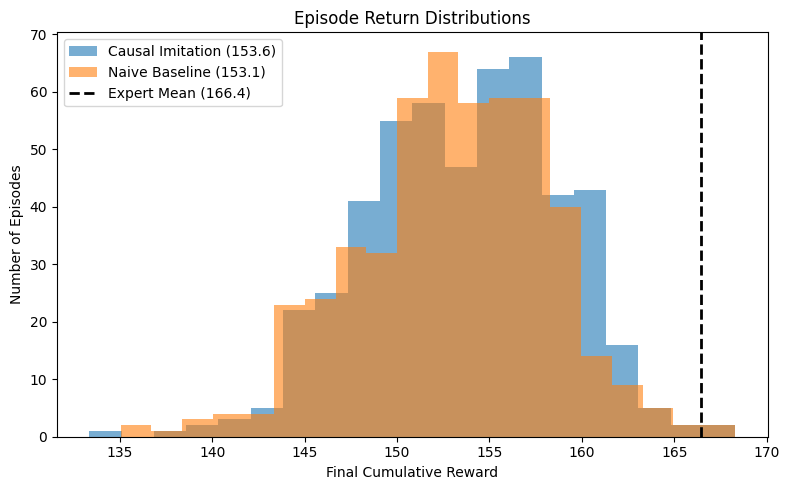

In [12]:
plt.figure(figsize=(8,5))
bins = 20  # number of histogram bins

expert_mean = np.mean(expert_rewards)
causal_mean = sum(causal_rewards) / len(causal_rewards)
naive_mean = sum(naive_rewards) / len(naive_rewards)

# plot histograms for causal and naive
plt.hist(causal_rewards, bins=bins, alpha=0.6, label=f'Causal Imitation ({causal_mean:.1f})')
plt.hist(naive_rewards,  bins=bins, alpha=0.6, label=f'Naive Baseline ({naive_mean:.1f})')

# compute and plot expert mean as a vertical line
plt.axvline(expert_mean, color='black', linestyle='--', linewidth=2, label=f'Expert Mean ({expert_mean:.1f})')

plt.xlabel('Final Cumulative Reward')
plt.ylabel('Number of Episodes')
plt.title('Episode Return Distributions')
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
causal_records = collect_imitator_trajectories(env, causal_policies, train_eps, num_steps, seed)
naive_records = collect_imitator_trajectories(env, naive_policies, train_eps, num_steps, seed)

Starting episode 1/500...
  Episode 1 ended at step 200 (terminated: False, truncated: True).
Starting episode 2/500...
  Episode 2 ended at step 200 (terminated: False, truncated: True).
Starting episode 3/500...
  Episode 3 ended at step 200 (terminated: False, truncated: True).
Starting episode 4/500...
  Episode 4 ended at step 200 (terminated: False, truncated: True).
Starting episode 5/500...
  Episode 5 ended at step 200 (terminated: False, truncated: True).
Starting episode 6/500...
  Episode 6 ended at step 200 (terminated: False, truncated: True).
Starting episode 7/500...
  Episode 7 ended at step 200 (terminated: False, truncated: True).
Starting episode 8/500...
  Episode 8 ended at step 200 (terminated: False, truncated: True).
Starting episode 9/500...
  Episode 9 ended at step 200 (terminated: False, truncated: True).
Starting episode 10/500...
  Episode 10 ended at step 200 (terminated: False, truncated: True).
Starting episode 11/500...
  Episode 11 ended at step 200 

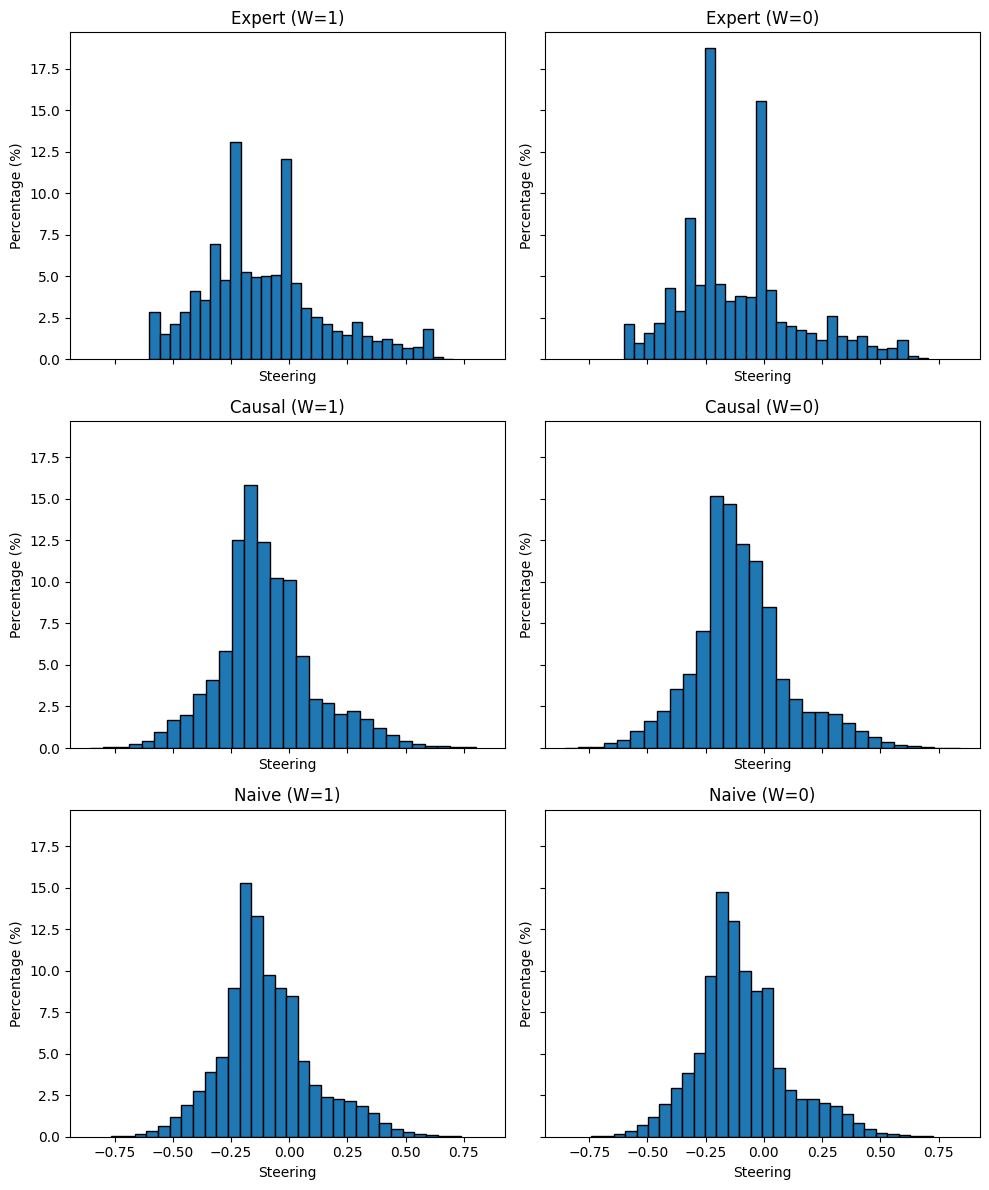

In [14]:
def filtered(records, state: List[Tuple[str, int]]):
    filtered_records = []
    for r in records:
        for var, val in state:
            index = -1 if var in ('X', 'Y') else -2 # X and Y have one less entry in the info
            loc = 'obs' if var in env.env.observed_unobserved_vars[0] else 'info'

            if -index <= len(r[loc][var]) and r[loc][var][index] == val:
                filtered_records.append(r)

    return filtered_records

# Prepare data for plotting
state1 = [('W', 1)]
state0 = [('W', 0)]

expert_filtered1 = filtered(records, state1)
expert_filtered0 = filtered(records, state0)
causal_filtered1 = filtered(causal_records, state1)
causal_filtered0 = filtered(causal_records, state0)
naive_filtered1 = filtered(naive_records, state1)
naive_filtered0 = filtered(naive_records, state0)

# Count actions for each filtered result
expert_actions1 = [r['action'] for r in expert_filtered1]
expert_actions0 = [r['action'] for r in expert_filtered0]
causal_actions1 = [r['action'] for r in causal_filtered1]
causal_actions0 = [r['action'] for r in causal_filtered0]
naive_actions1 = [r['action'] for r in naive_filtered1]
naive_actions0 = [r['action'] for r in naive_filtered0]

datasets = [
    (expert_actions1,  "Expert (W=1)"),
    (expert_actions0,  "Expert (W=0)"),
    (causal_actions1,  "Causal (W=1)"),
    (causal_actions0,  "Causal (W=0)"),
    (naive_actions1,   "Naive (W=1)"),
    (naive_actions0,   "Naive (W=0)"),
]

fig, axes = plt.subplots(3, 2, figsize=(10, 12), sharex=True, sharey=True)
axes = axes.flatten()

for ax, (data, title) in zip(axes, datasets):
    counts, bins, _ = ax.hist(data, bins=30, edgecolor='black', weights=np.ones(len(data)) / len(data) * 100)
    ax.set_title(title)
    ax.set_xlabel("Steering")
    ax.set_ylabel("Percentage (%)")

plt.tight_layout()
plt.show()

In [ ]:
with open('./policies/causal.pickle', 'wb') as f:
    pickle.dump(causal_policies, f)

with open('./policies/naive.pickle', 'wb') as f:
    pickle.dump(naive_policies, f)

In [ ]:
# with open('./policies/causal.pickle', 'rb') as f:
#     causal_policies = pickle.load(f)

# with open('./policies/naive.pickle', 'rb') as f:
#     naive_policies = pickle.load(f)

In [15]:
t = 200
testenv = RacePCH(num_steps=t, render_mode='human', task=Task(learning_regime='see_do'))

In [ ]:
obs, _ = testenv.reset()

for step in range(t):
    # action = causal_policies[f'X{step}'](obs)
    # action = naive_policies[f'X{step}'](obs)
    # obs, reward, terminated, truncated, info = testenv.do(action, show_reward=True)
    action, obs, reward, terminated, truncated, info = testenv.see(show_reward=True)
    testenv.render()

    if terminated or truncated:
        testenv.env._env.close()
        break